In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
import tensorflow as tf 

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
diabetes_data=pd.read_csv('diabetes_data.csv')

In [4]:
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
le=LabelEncoder()

In [6]:
cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class']
diabetes_data[cols] = diabetes_data[cols].apply(LabelEncoder().fit_transform)


In [7]:
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
# Display first five records of data
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
# Display last five records of data
diabetes_data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#Display randomly any number of records of data
diabetes_data.sample(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
65,40,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
78,39,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
427,39,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
172,60,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
199,69,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1
423,66,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
142,49,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
253,43,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1


In [11]:
diabetes_data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
 16  class               520 non-null    int32
dt

In [13]:
diabetes_data.shape

(520, 17)

In [14]:
diabetes_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [15]:
diabetes_data.dtypes

Age                   int64
Gender                int32
Polyuria              int32
Polydipsia            int32
sudden weight loss    int32
weakness              int32
Polyphagia            int32
Genital thrush        int32
visual blurring       int32
Itching               int32
Irritability          int32
delayed healing       int32
partial paresis       int32
muscle stiffness      int32
Alopecia              int32
Obesity               int32
class                 int32
dtype: object

In [16]:
diabetes_data.isnull().values.any()

False

In [17]:
diabetes_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

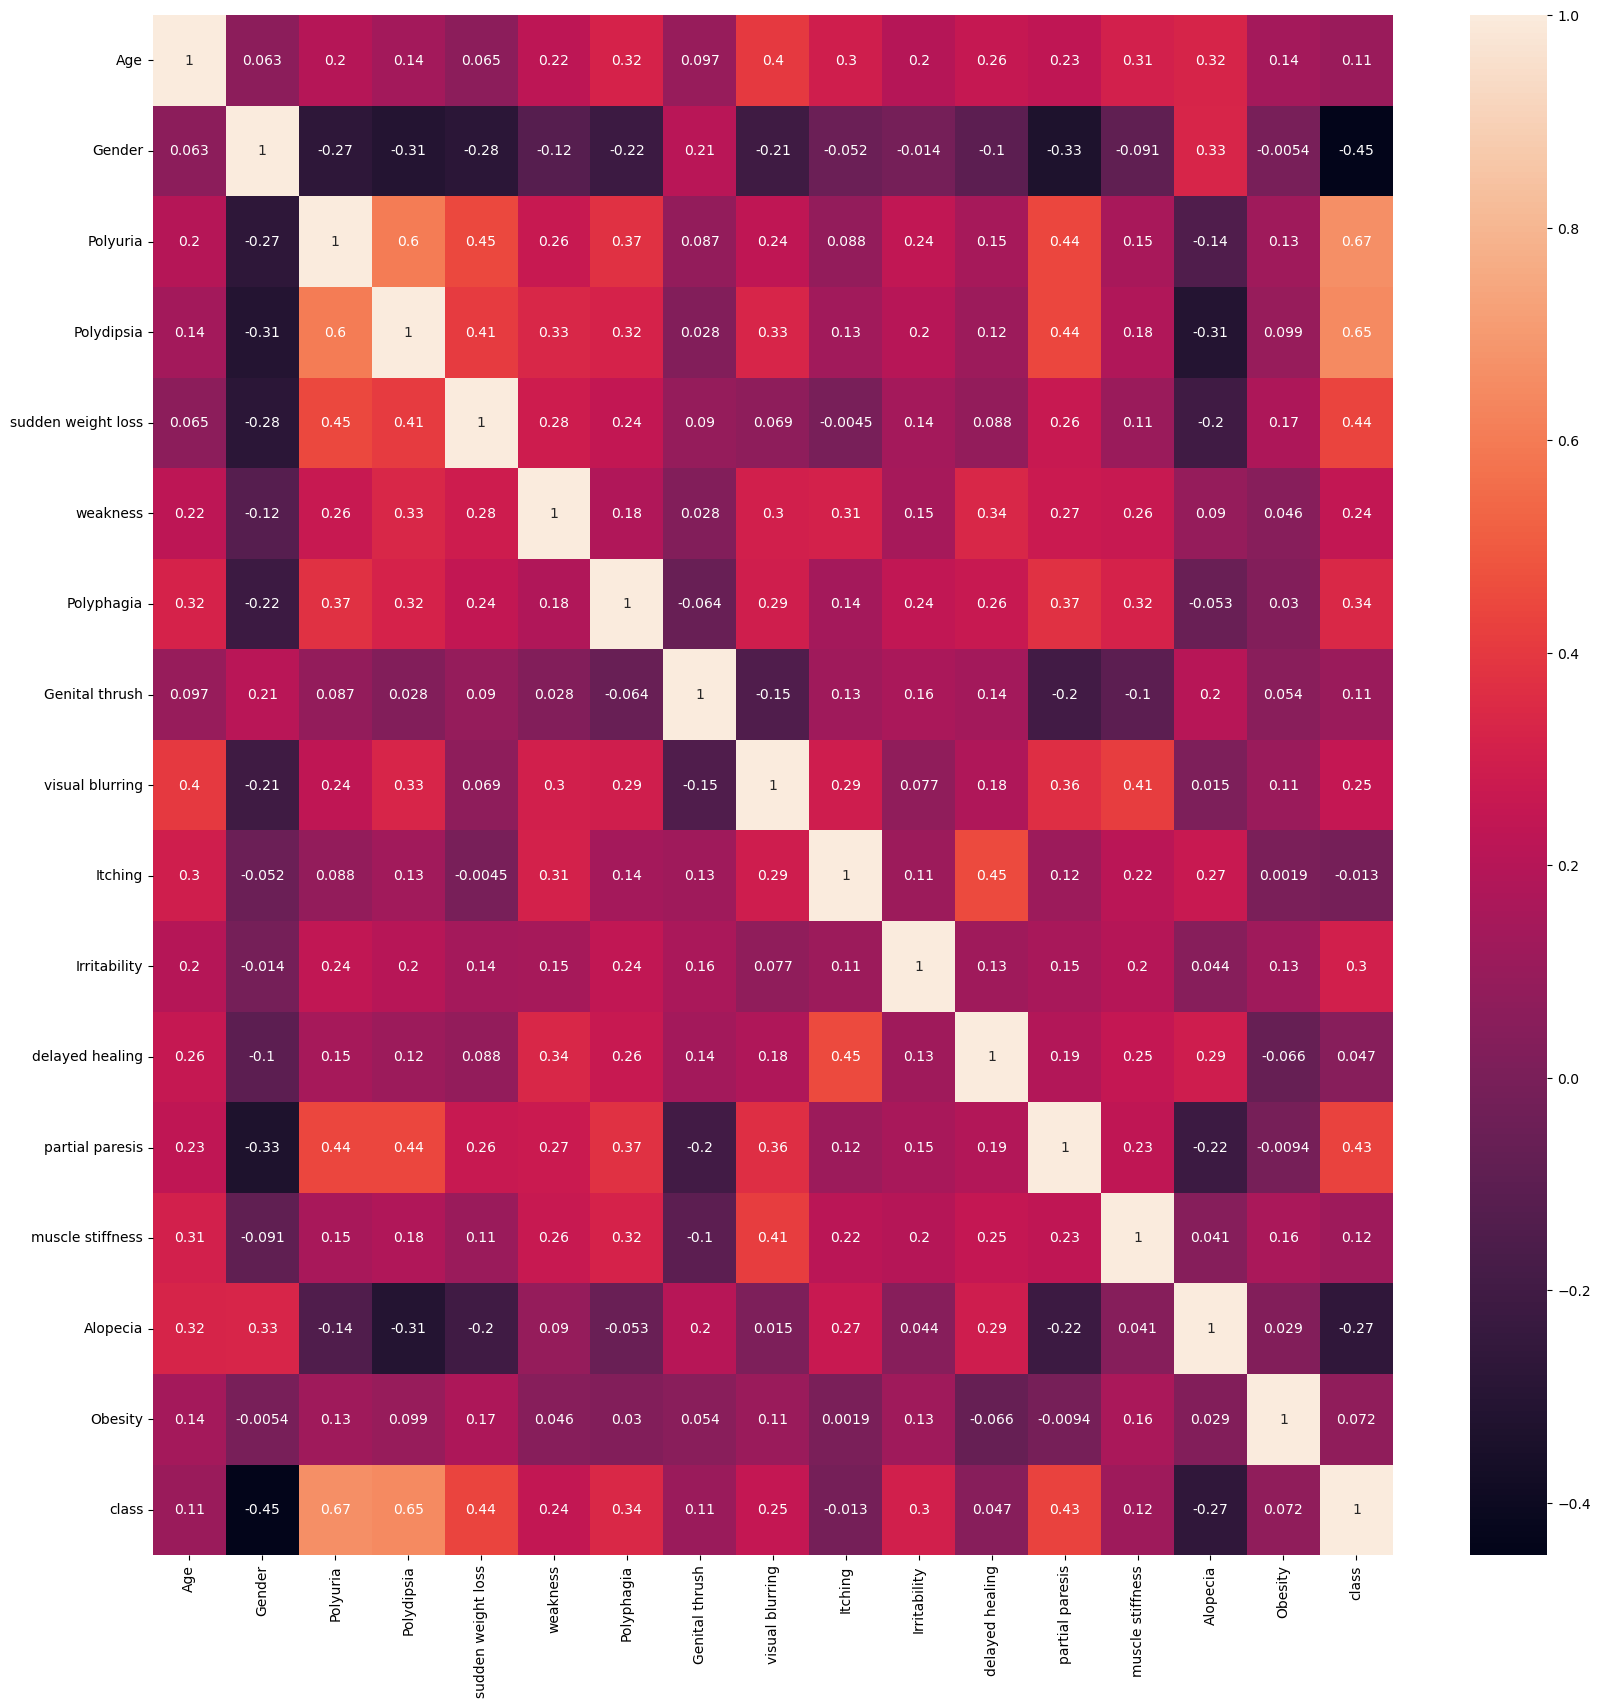

In [18]:
#get correlation of each features in dataset
corrmat=diabetes_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))

#plot heatmap
g=sns.heatmap(diabetes_data[top_corr_features].corr(),annot=True)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Polyuria'}>,
        <AxesSubplot:title={'center':'Polydipsia'}>],
       [<AxesSubplot:title={'center':'sudden weight loss'}>,
        <AxesSubplot:title={'center':'weakness'}>,
        <AxesSubplot:title={'center':'Polyphagia'}>,
        <AxesSubplot:title={'center':'Genital thrush'}>],
       [<AxesSubplot:title={'center':'visual blurring'}>,
        <AxesSubplot:title={'center':'Itching'}>,
        <AxesSubplot:title={'center':'Irritability'}>,
        <AxesSubplot:title={'center':'delayed healing'}>],
       [<AxesSubplot:title={'center':'partial paresis'}>,
        <AxesSubplot:title={'center':'muscle stiffness'}>,
        <AxesSubplot:title={'center':'Alopecia'}>,
        <AxesSubplot:title={'center':'Obesity'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

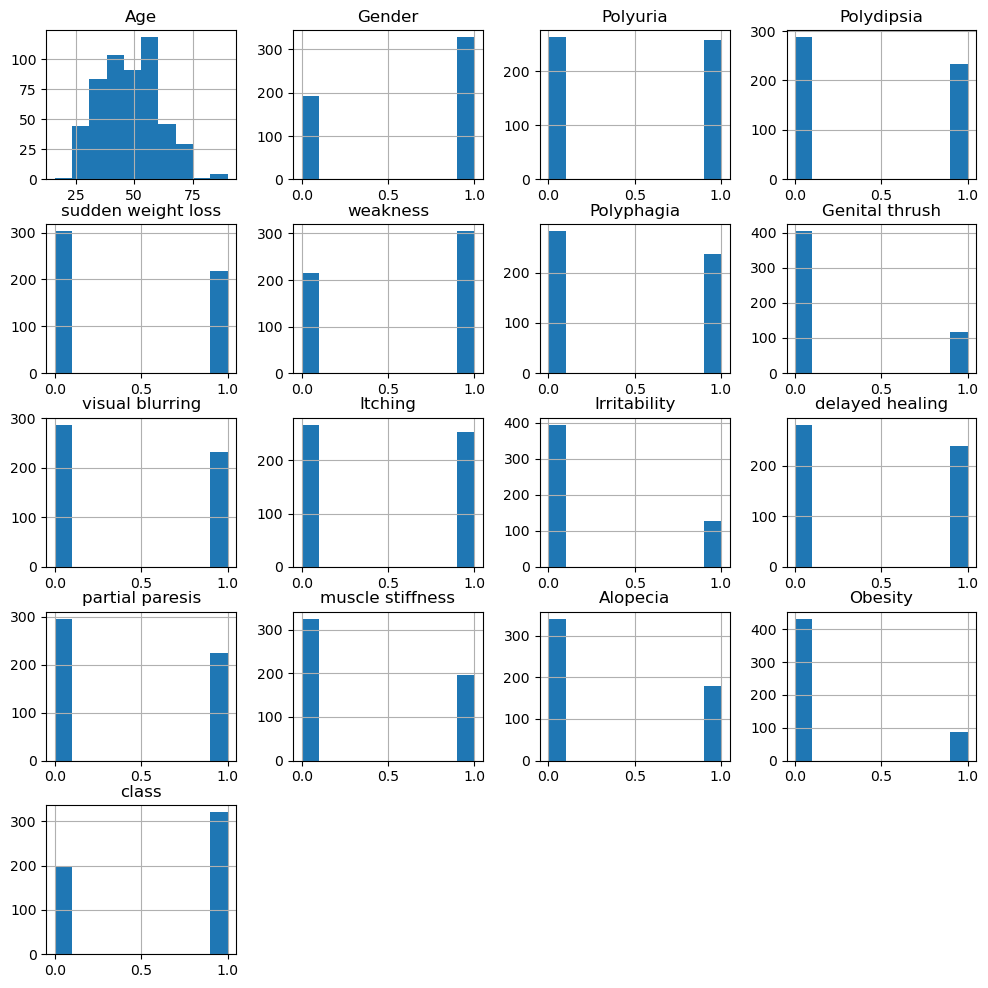

In [19]:
diabetes_data.hist(figsize=(12,12))

In [20]:
diabetes_data['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

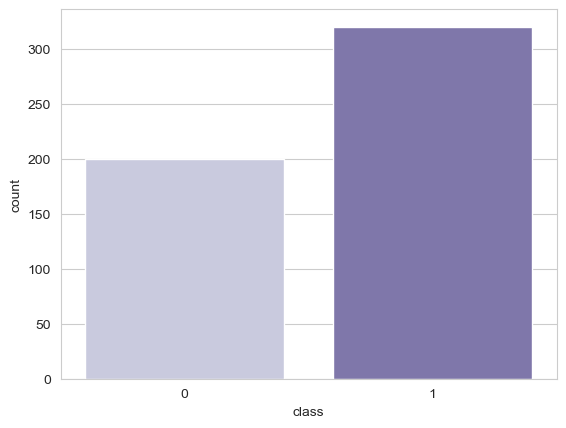

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=diabetes_data,palette='Purples')

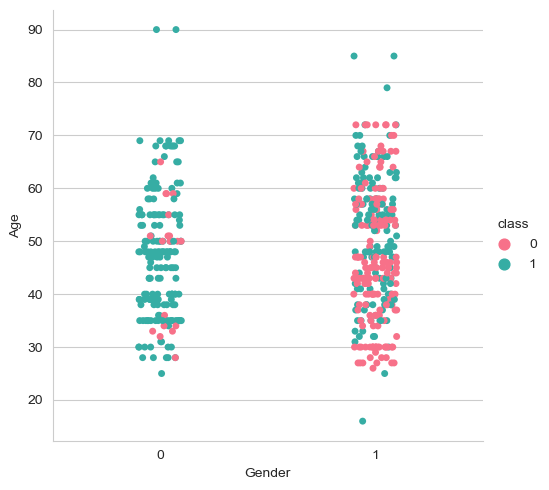

In [22]:
sns.catplot(data=diabetes_data,x='Gender',y='Age',hue='class',palette='husl')

<AxesSubplot:xlabel='Gender', ylabel='Obesity'>

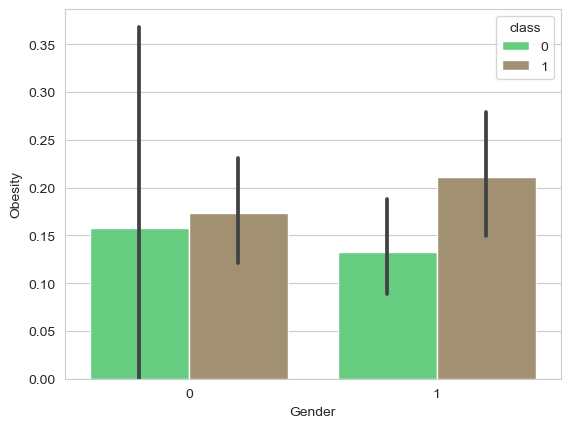

In [23]:
sns.barplot(data=diabetes_data,x='Gender',y='Obesity',hue='class',palette='terrain')

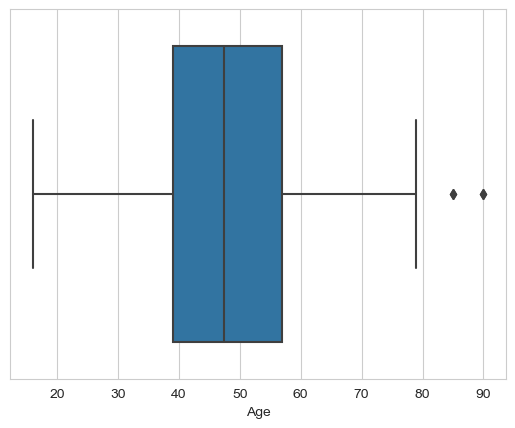

In [24]:
# check if there are outliners in the features
sns.boxplot(x=diabetes_data.Age)
plt.show()


<AxesSubplot:xlabel='Gender', ylabel='count'>

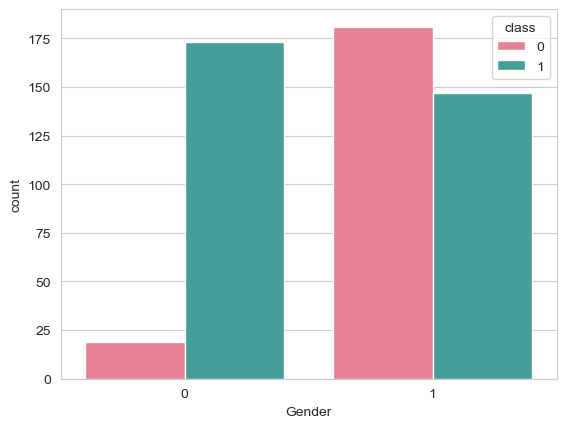

In [25]:
sns.countplot(x='Gender',data=diabetes_data,palette='husl',hue='class')

<AxesSubplot:xlabel='Polyuria', ylabel='count'>

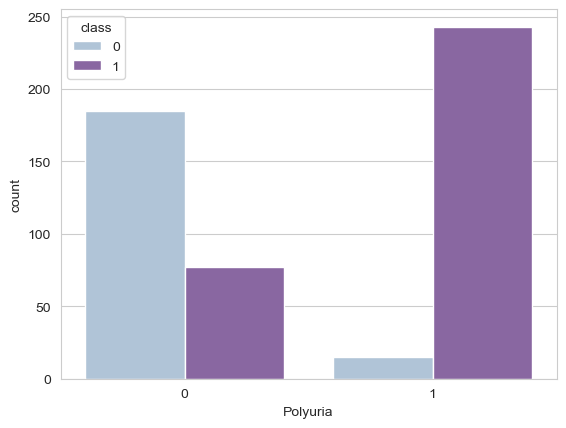

In [26]:
sns.countplot(data=diabetes_data,x='Polyuria',hue='class',palette='BuPu')

<AxesSubplot:xlabel='Polyuria', ylabel='count'>

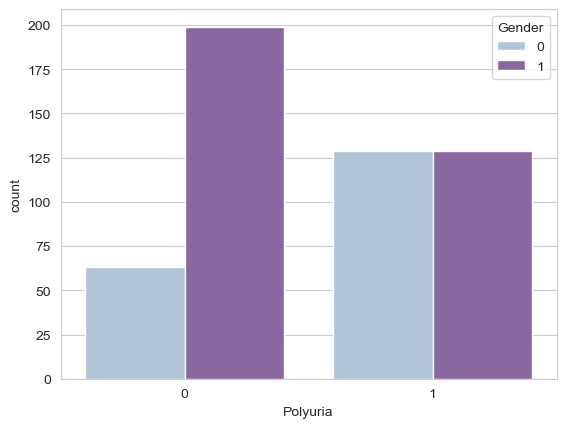

In [27]:
sns.countplot(data=diabetes_data,x='Polyuria',hue='Gender',palette='BuPu')

In [28]:
gen=pd.crosstab(diabetes_data['Gender'],diabetes_data['class'])
print(gen)

class     0    1
Gender          
0        19  173
1       181  147


<AxesSubplot:xlabel='Gender'>

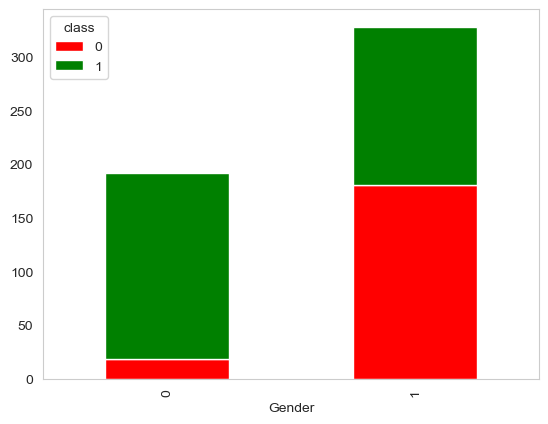

In [29]:
gen.plot(kind='bar',stacked=True,color=['red','green'],grid=False)

In [30]:
age=pd.crosstab(diabetes_data['Age'],diabetes_data['class'])
age

class,0,1
Age,,
16,0,1
25,0,2
26,1,0
27,6,0
28,4,5
29,1,0
30,18,7
31,0,3
32,2,3


<AxesSubplot:xlabel='Age'>

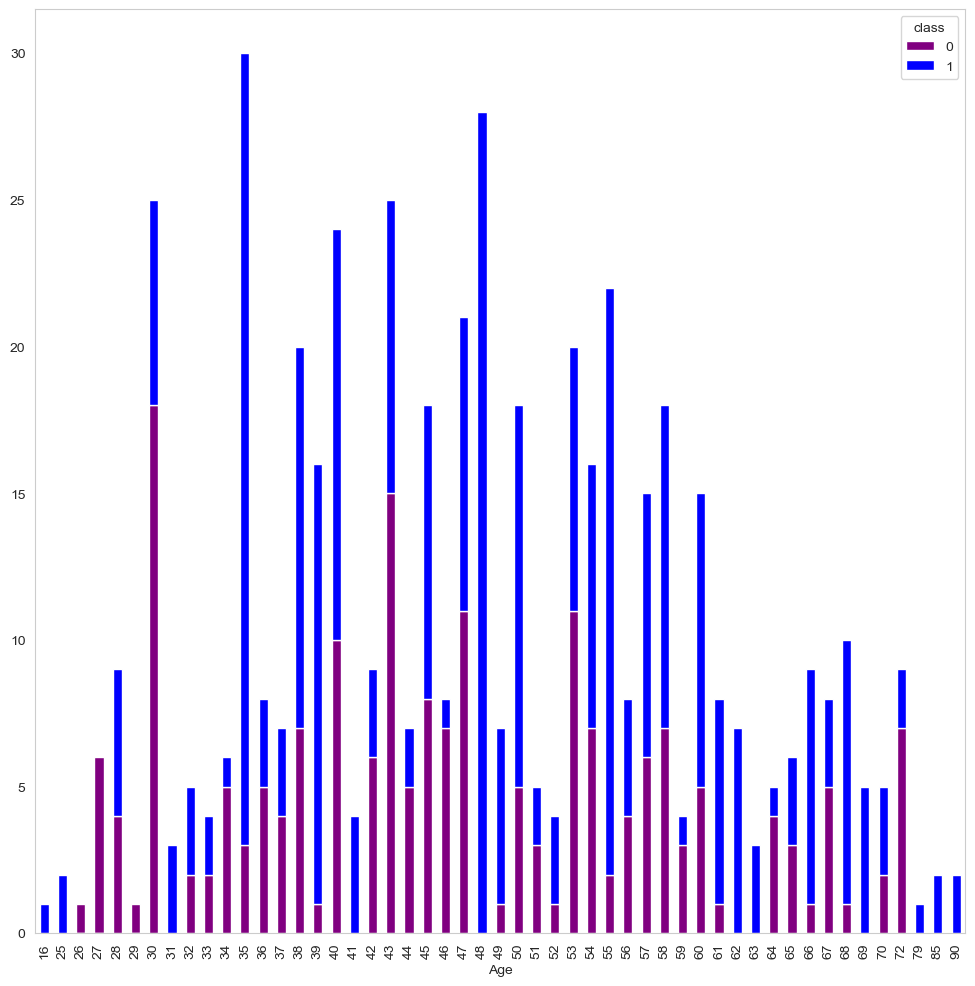

In [31]:
age.plot(kind='bar',stacked=True,color=['Purple','blue'],grid=False,figsize=(12,12))

In [32]:
pol=pd.crosstab(diabetes_data['Polyuria'],diabetes_data['class'])
print(pol)

class       0    1
Polyuria          
0         185   77
1          15  243


<AxesSubplot:xlabel='Polyuria'>

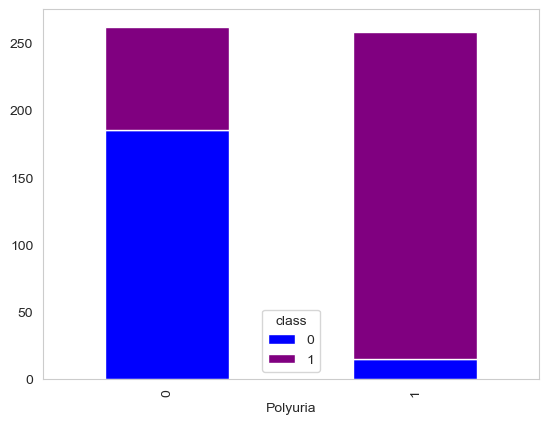

In [33]:
pol.plot(kind='bar',stacked=True,color=['blue','purple'],grid=False)

In [73]:
#split dataset to X and y
X=diabetes_data.drop('class',axis=1)
y=diabetes_data['class']

In [74]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [75]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

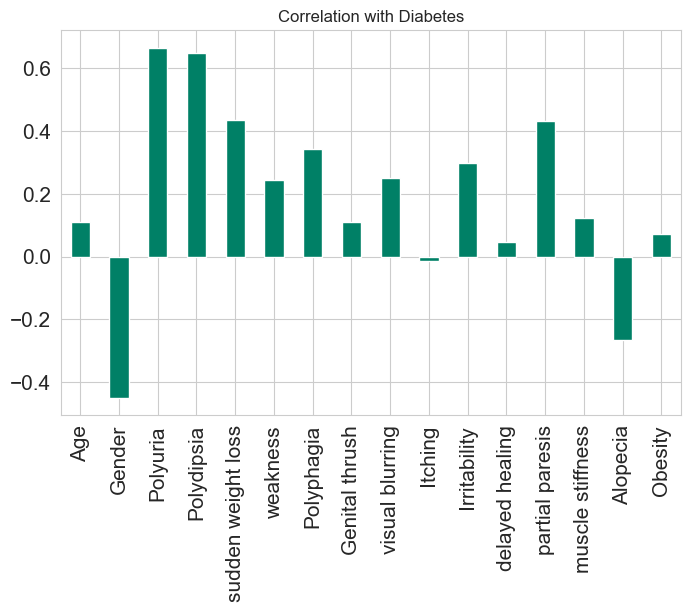

In [80]:
X.corrwith(y).plot.bar(title='Correlation with Diabetes',fontsize=15,figsize=(8,5),cmap='summer')

In [38]:
#scale X
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [39]:
#Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [40]:
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [41]:
X_train.size

6656

In [42]:
X_test.size

1664

In [43]:
y_train.size

416

In [44]:
y_test.size

104

 # Decision Tree 

In [45]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
C1=DTC.fit(X_train,y_train)

In [46]:
pred1=C1.predict(X_test_s)

In [47]:
print(pred1)

[1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0]


In [48]:
print(y_test)

264    1
327    0
289    0
172    1
326    0
      ..
248    0
347    0
101    1
155    1
284    0
Name: class, Length: 104, dtype: int32


In [49]:
from sklearn import metrics
acc1=metrics.accuracy_score(y_test,pred1)
print('accuracy:%.2f\n\n'%(acc1))
cm=metrics.confusion_matrix(y_test,pred1)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------')
result=metrics.classification_report(y_test,pred1)
print('Classification Report:\n')
print(result)

accuracy:0.95


Confusion Matrix:
[[36  2]
 [ 3 63]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.97      0.95      0.96        66

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



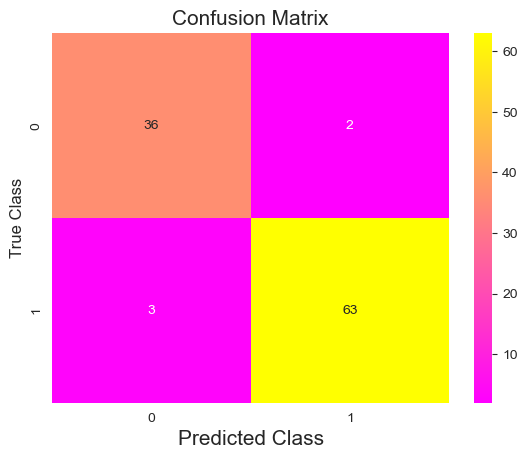

In [50]:
ax=sns.heatmap(cm,cmap='spring',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

  #  K-nearest Neighbors

In [87]:
KNN=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
C2=KNN.fit(X_train,y_train)

In [88]:
pred2=C2.predict(X_test_s)

In [89]:
acc2=metrics.accuracy_score(y_test,pred2)
print('accuracy:%.2f\n\n'%(acc2))
cm=metrics.confusion_matrix(y_test,pred2)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------')
result=metrics.classification_report(y_test,pred2)
print('Classification Report:\n')
print(result)

accuracy:0.93


Confusion Matrix:
[[36  2]
 [ 5 61]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.97      0.92      0.95        66

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



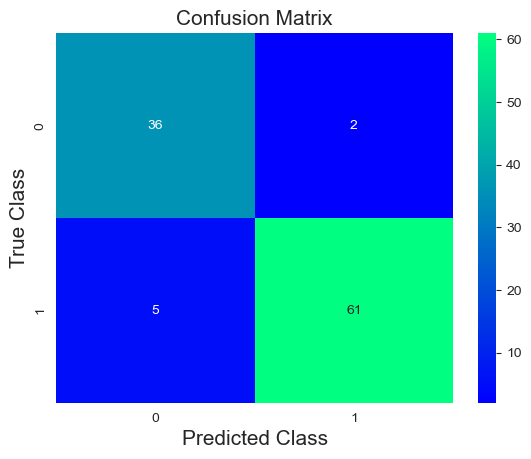

In [90]:
ax=sns.heatmap(cm,cmap='winter',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

 #  Logistic Regression

In [55]:
LR=LogisticRegression()
C3=LR.fit(X_train,y_train)

In [56]:
pred3=C3.predict(X_test_s)

In [57]:
acc3=metrics.accuracy_score(y_test,pred3)
print('accuracy:%.2f\n\n'%(acc3))
cm=metrics.confusion_matrix(y_test,pred3)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------')
result=metrics.classification_report(y_test,pred3)
print('Classification Report:\n')
print(result)

accuracy:0.96


Confusion Matrix:
[[36  2]
 [ 2 64]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.97      0.97      0.97        66

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



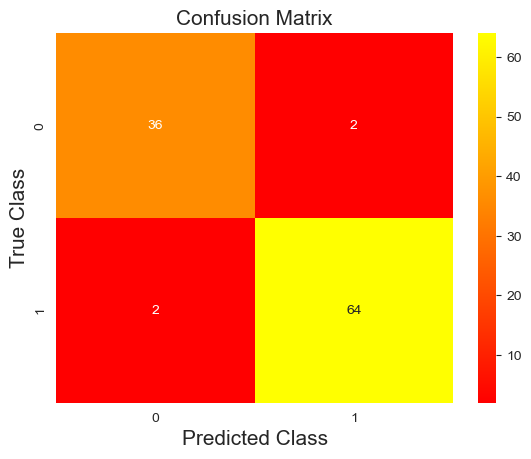

In [58]:
ax=sns.heatmap(cm,cmap='autumn',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

# Artificial Neural Network

In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(16,))) 
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train,batch_size = 10, epochs= 50,verbose=2, validation_split=0.2)

Epoch 1/50
34/34 - 1s - loss: 0.8706 - accuracy: 0.4367 - val_loss: 0.7193 - val_accuracy: 0.5238 - 746ms/epoch - 22ms/step
Epoch 2/50
34/34 - 0s - loss: 0.7191 - accuracy: 0.4970 - val_loss: 0.6226 - val_accuracy: 0.6310 - 70ms/epoch - 2ms/step
Epoch 3/50
34/34 - 0s - loss: 0.6171 - accuracy: 0.6386 - val_loss: 0.5515 - val_accuracy: 0.7024 - 67ms/epoch - 2ms/step
Epoch 4/50
34/34 - 0s - loss: 0.5404 - accuracy: 0.7289 - val_loss: 0.4945 - val_accuracy: 0.7619 - 68ms/epoch - 2ms/step
Epoch 5/50
34/34 - 0s - loss: 0.4819 - accuracy: 0.7229 - val_loss: 0.4533 - val_accuracy: 0.8095 - 65ms/epoch - 2ms/step
Epoch 6/50
34/34 - 0s - loss: 0.4364 - accuracy: 0.7590 - val_loss: 0.4197 - val_accuracy: 0.8452 - 64ms/epoch - 2ms/step
Epoch 7/50
34/34 - 0s - loss: 0.3982 - accuracy: 0.8012 - val_loss: 0.3936 - val_accuracy: 0.8333 - 59ms/epoch - 2ms/step
Epoch 8/50
34/34 - 0s - loss: 0.3672 - accuracy: 0.8223 - val_loss: 0.3729 - val_accuracy: 0.8333 - 62ms/epoch - 2ms/step
Epoch 9/50
34/34 - 0s 

In [94]:
accuracy = history.history['accuracy'] 
validation_accuracy = history.history['val_accuracy']

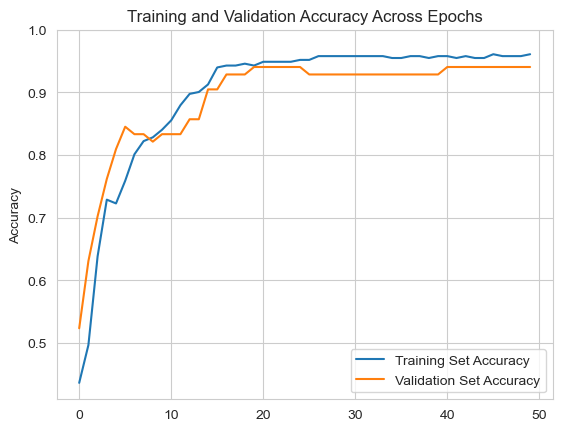

In [95]:
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [96]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss']

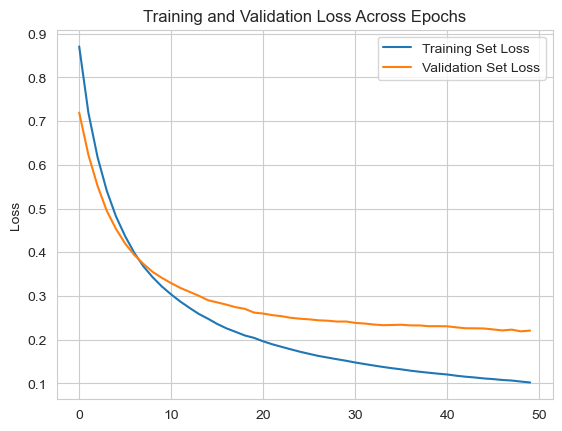

In [97]:
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss') 
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [98]:
y_pred = model.predict(X_test_s) 
y_pred = y_pred.argmax(axis=1)

4/4 [==============================] - 0s 2ms/step


In [99]:
acc4=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc4))
print(classification_report(y_test,y_pred))

accuracy:0.94


              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



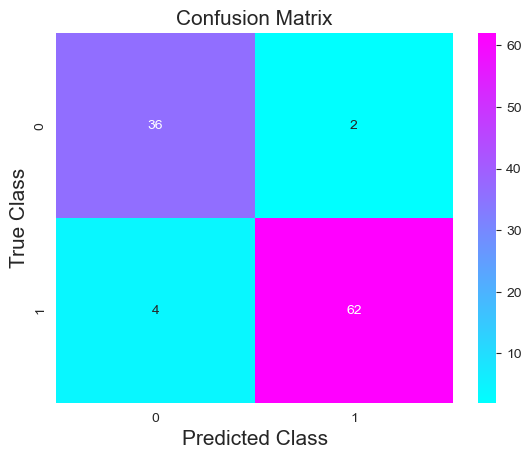

In [103]:
confusion_matrix = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='cool',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15) 
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [104]:
print('Decision Tree Accuracy :-',acc1)
print('K-Nearest Neighbors Accuracy :-',acc2)
print('Logistic Regression Accuracy :-',acc3)
print('Artificial Neural Network :-',acc4)

Decision Tree Accuracy :- 0.9519230769230769
K-Nearest Neighbors Accuracy :- 0.9326923076923077
Logistic Regression Accuracy :- 0.9615384615384616
Artificial Neural Network :- 0.9423076923076923
